## Sales Analysis

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [3]:
##### Merge 12 months sales data into a single CSV file ####

# all_months_data = pd.DataFrame()
# 
# monthly_data_files_as_paths = glob.glob('C:/Users/MSI/Desktop/data-science-projects/project-1/monthly-sales-data/*.csv')
# 
# for file_path in monthly_data_files_as_paths:
#     monthly_data = pd.read_csv(file_path)
#     all_months_data = pd.concat([all_months_data, monthly_data], axis=0)
# 
# all_months_data.to_csv("all_months_data", index=False)

#### Revenue column shows total revenue for each order

In [4]:
data = pd.read_csv('all_months_data')
data = data.dropna()
data["Month"] = data["Order Date"].str[0:2]
data = data[data["Month"].str[0:2] != "Or"]
data["Month"] = pd.to_numeric(data["Month"])
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Price Each"] = pd.to_numeric(data["Price Each"])
data["Revenue"] = data["Quantity Ordered"] * data["Price Each"]

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Revenue column shows monthly total revenue

In [5]:
monthly_revenue_sum = data.groupby("Month").sum()
print(monthly_revenue_sum)

       Quantity Ordered  Price Each     Revenue
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


#### Bar chart of monthly total revenue

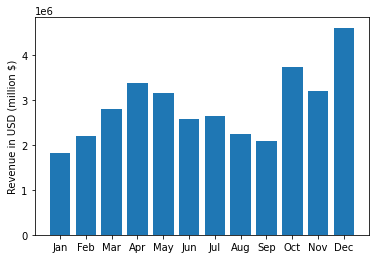

In [6]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(months, monthly_revenue_sum["Revenue"])
plt.ylabel("Revenue in USD (million $)")

plt.show()

#### City column indicates the place where the sale was made

In [7]:
data["City"] = data["Purchase Address"].str.split(",").str.get(1) + " " + "(" + data["Purchase Address"].str.split(",").str.get(2).str.split(" ").str.get(1) + ")"
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Revenue column shows total revenue from cities

In [8]:
city_total_revenue = data.groupby("City").sum()
city_total_revenue

,Quantity Ordered,Price Each,Month,Revenue
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


#### Bar chart of total revenue from cities

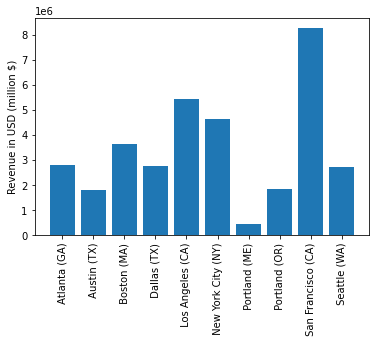

In [9]:
cities = np.sort(data["City"].unique())
plt.bar(cities, city_total_revenue["Revenue"])
plt.ylabel("Revenue in USD (million $)")
plt.xticks(rotation="vertical")

plt.show()

In [10]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

#### Hour, minute and count columns specify sale details about when and how many

In [11]:
data["Hour"] = data["Order Date"].dt.hour
data["Minute"] = data["Order Date"].dt.minute
data["Count"] = 1

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


#### Count column shows total number of orders per hour

In [18]:
hours = data.groupby("Hour").sum()
hours.head()

,Quantity Ordered,Price Each,Month,Revenue,Minute,Count
Hour,,,,,,
0,4428,709296.70,27554,713721.27,103596,3910
1,2619,458490.00,16657,460866.88,61807,2350
2,1398,233833.64,8507,234851.44,32508,1243
3,928,144726.42,5904,145757.89,23044,831
4,937,162058.18,6148,162661.01,26876,854


#### Graph of hourly sale counts

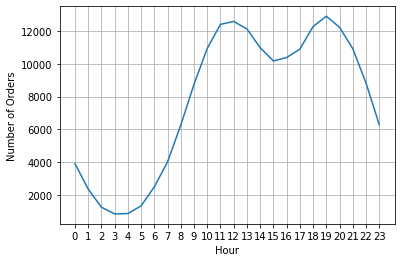

In [13]:
plt.plot(range(24), hours["Count"])
plt.grid()
plt.xticks(range(24))
plt.xlabel("Hour")
plt.ylabel("Number of Orders")

plt.show()

#### Which product sold the most?

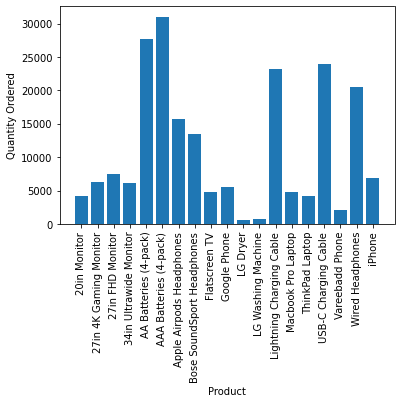

In [32]:
most_sold_product = data.groupby("Product").sum()
products = np.sort(data["Product"].unique())

plt.bar(products, most_sold_product["Quantity Ordered"])
plt.xticks(rotation="vertical")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()
# print(products)